In [1]:
import numpy as np
import mne
import scipy.stats
import os
os.chdir('/Brain/private/v20subra/LSD_project/scripts/')
import utility_functions
import scipy
import importlib
importlib.reload(utility_functions)
import seaborn as sns
import pandas as pd

HOMEDIR = "/Brain/private/v20subra/LSD_project"

graph = scipy.io.loadmat(f'{HOMEDIR}/src_data/SC_avg56.mat')['SC_avg56']
laplacian, eigvals, eigvectors = utility_functions.eigmodes(graph)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d5ef1ad10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d5ef1b250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d5ef1aa70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d5ef1b670>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d5ef1b910>],
 'means': []}

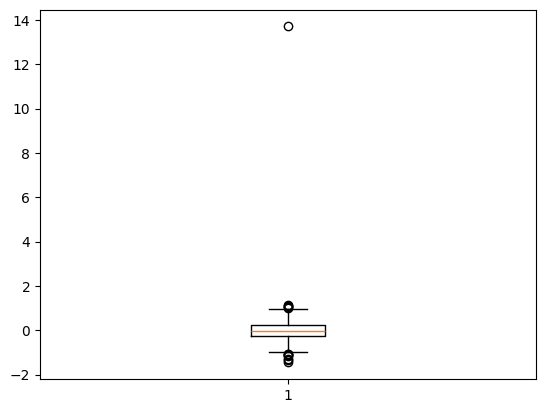

In [17]:
import numpy
import random
numpy.random.seed(0)
signal = numpy.random.random((360,1))*1.5
psd_scaled = eigvectors.T @ signal
import matplotlib.pyplot as plt
plt.boxplot(psd_scaled)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d5ef93730>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d5ef93c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d5ef93490>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d5efd01f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d5efd0490>],
 'means': []}

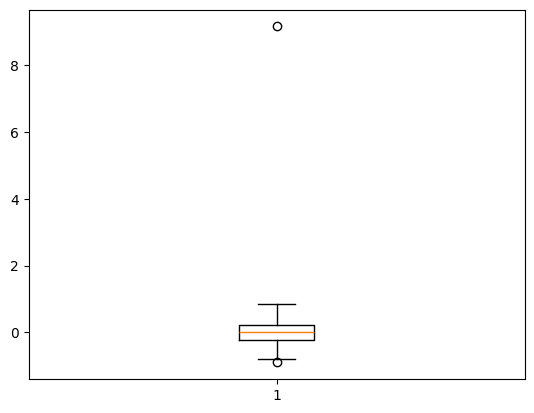

In [18]:
signal = numpy.random.random((360,1))
psd = eigvectors.T @ signal
import matplotlib.pyplot as plt
plt.boxplot(psd)

(array([ 2.,  2.,  4., 13., 10., 13., 18., 32., 51., 61., 50., 38., 23.,
        22.,  8.,  6.,  5.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-1.45358072, -1.30194964, -1.15031856, -0.99868748, -0.84705641,
        -0.69542533, -0.54379425, -0.39216317, -0.24053209, -0.08890102,
         0.06273006,  0.21436114,  0.36599222,  0.5176233 ,  0.66925438,
         0.82088545,  0.97251653,  1.12414761,  1.27577869,  1.42740977,
         1.57904084,  1.73067192,  1.882303  ,  2.03393408,  2.18556516,
         2.33719623,  2.48882731,  2.64045839,  2.79208947,  2.943720

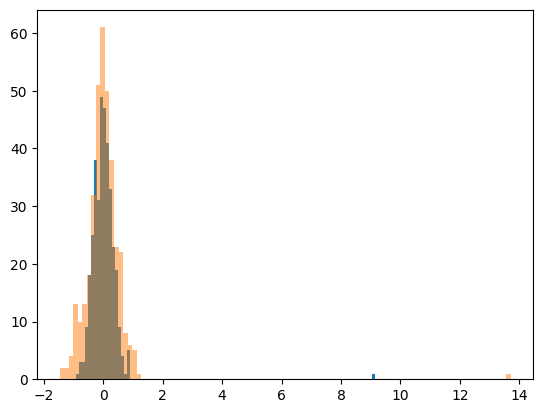

In [26]:
plt.hist(psd, bins=100)
plt.hist(psd_scaled, alpha = 0.5, bins=100)

# PSD Compute

In [4]:
#################################################

def graph_psd_compute(src_data, eigvectors):
    # Compute PSD for each epoch and average across epochs
    n_epochs, _, _ = src_data.shape
    psd_all = list()
    for epoch in range(n_epochs):
        psd, _ = utility_functions.compute_gpsd(src_data[epoch], eigvectors)
        psd_all.append(psd)
    
    return np.mean(psd_all, axis=0)


    
def compute_psd_subjects(task, drug):
    psd_subjects = dict() 
    for sub in ['003', '005', '006', '009', '010', '013', '015', '016', '017', '018']:
        src_data = np.load(f'{HOMEDIR}/src_data/derivatives/func/{task}/{drug}/sub-{sub}/meg/source_estimates/sub-{sub}_.npz', allow_pickle=True)['stc_data_parcellated']
        psd_subjects[f'{sub}'] = graph_psd_compute(src_data, eigvectors)

    return psd_subjects

LSD = compute_psd_subjects(task='Music', drug='LSD')
PLA = compute_psd_subjects(task='Music', drug='PLA')

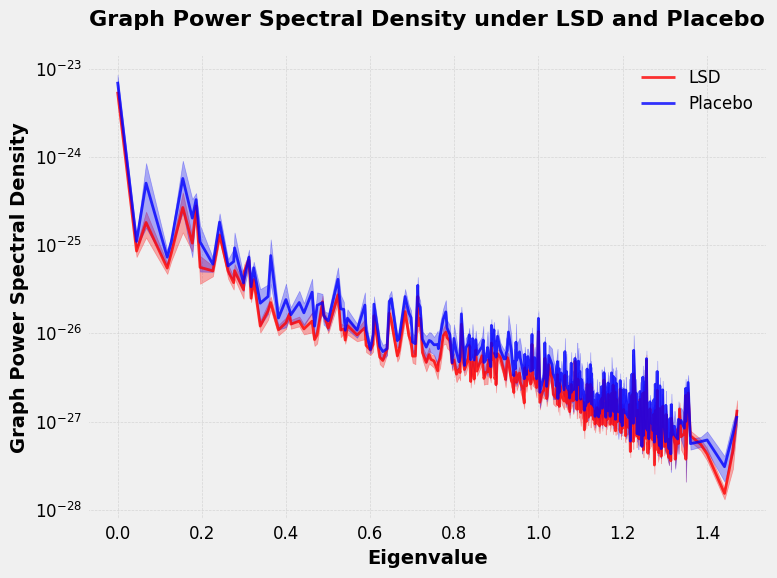

In [5]:

import matplotlib.pyplot as plt
from scipy.stats import sem

plt.style.use('fivethirtyeight')

LSD_array = np.array(list(LSD.values()))
PLA_array = np.array(list(PLA.values()))

mean_LSD = np.mean(LSD_array, axis=0)
mean_PLA = np.mean(PLA_array, axis=0)

sem_LSD = sem(LSD_array, axis=0)
sem_PLA = sem(PLA_array, axis=0)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot LSD with SEM
plt.semilogy(eigvals, mean_LSD, label='LSD', color='red', alpha=0.8, linewidth=2)
plt.fill_between(eigvals, mean_LSD - sem_LSD, mean_LSD + sem_LSD, color='red', alpha=0.3)

# Plot PLA with SEM
plt.semilogy(eigvals, mean_PLA, label='Placebo', color='blue', alpha=0.8, linewidth=2)
plt.fill_between(eigvals, mean_PLA - sem_PLA, mean_PLA + sem_PLA, color='blue', alpha=0.3)

# Aesthetics
plt.xlabel('Eigenvalue', fontsize=14, weight='bold')
plt.ylabel('Graph Power Spectral Density', fontsize=14, weight='bold')
plt.title('Graph Power Spectral Density under LSD and Placebo', fontsize=16, weight='bold', pad=20)
plt.legend(fontsize=12, loc='upper right', frameon=False)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

/tmp/ipykernel_446080/2659466711.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=total_power_data, x='Condition', y='Total Power',


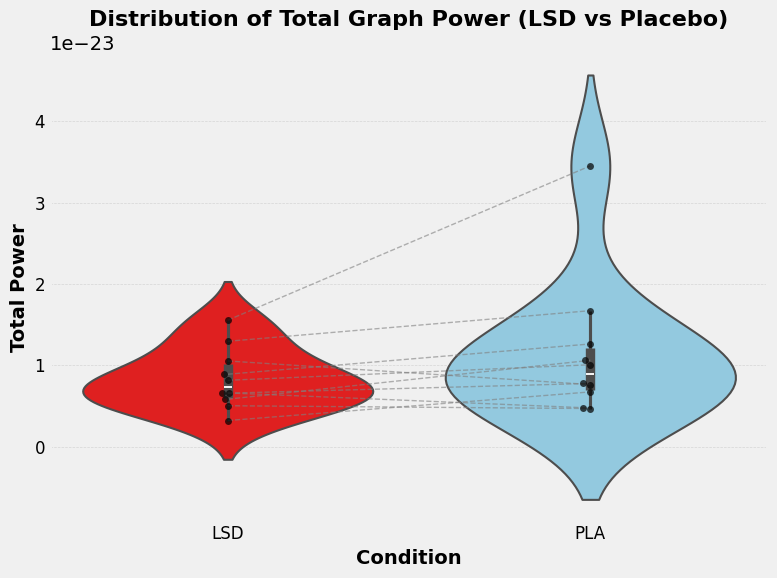

In [6]:
total_power_LSD = np.sum(LSD_array, axis=1)
total_power_PLA = np.sum(PLA_array, axis=1)

n_subjects = 10

# Create a DataFrame for plotting
total_power_data = pd.DataFrame({
    'Total Power': np.concatenate([total_power_LSD, total_power_PLA]),
    'Condition': ['LSD'] * len(total_power_LSD) + ['PLA'] * len(total_power_PLA),
    'Subject': np.tile(np.arange(n_subjects), 2)  # Add subject identifiers
})

# Plot the violin plot with custom colors
plt.figure(figsize=(8, 6))
sns.violinplot(data=total_power_data, x='Condition', y='Total Power', 
               palette={'LSD': 'red', 'PLA': '#87CEEB'},  # Lighter blue for PLA
               inner="box", linewidth=1.5)

# Overlay swarmplot
sns.swarmplot(data=total_power_data, x='Condition', y='Total Power', color='black', alpha=0.7, size=5)

# Draw paired lines
subjects = total_power_data['Subject'].unique()
for subject in subjects:
    subject_data = total_power_data[total_power_data['Subject'] == subject]
    plt.plot(
        [0, 1],  # X-coordinates for LSD and PLA
        subject_data['Total Power'].values,  # Y-coordinates for paired points
        color='gray', alpha=0.6, linewidth=1, linestyle='--'
    )

# Aesthetics
plt.title('Distribution of Total Graph Power (LSD vs Placebo)', fontsize=16, weight='bold', pad=20)
plt.xlabel('Condition', fontsize=14, weight='bold')
plt.ylabel('Total Power', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

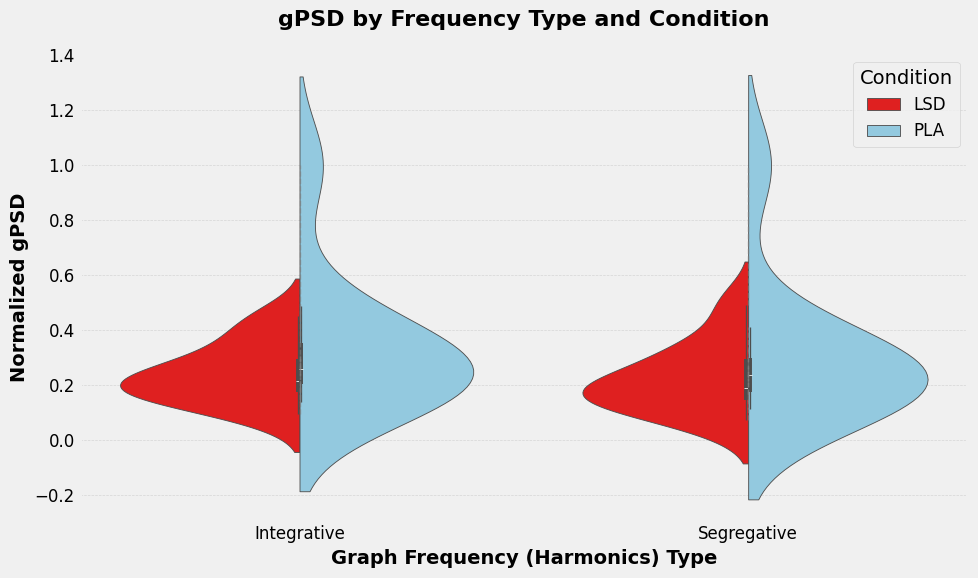

In [7]:
def frequency_splits(psd):
    low = psd[:, :164] # integrative
    high = psd[:, 211:] # segregative
    return low, high


LSD_low, LSD_high = frequency_splits(np.array(list(LSD.values())))
PLA_low, PLA_high = frequency_splits(np.array(list(PLA.values())))


LSD_high_sum = np.sum(LSD_high, axis=1)
LSD_low_sum = np.sum(LSD_low, axis=1)

PLA_high_sum = np.sum(PLA_high, axis=1)
PLA_low_sum = np.sum(PLA_low, axis=1)

LSD_high_sum_norm = LSD_high_sum / np.max([LSD_high_sum, PLA_high_sum])
PLA_high_sum_norm = PLA_high_sum / np.max([LSD_high_sum, PLA_high_sum])

LSD_low_sum_norm = LSD_low_sum / np.max([LSD_low_sum, PLA_low_sum])
PLA_low_sum_norm = PLA_low_sum / np.max([LSD_low_sum, PLA_low_sum])
# Create DataFrame for plotting
data = pd.DataFrame({
    "Subject": list(range(1, n_subjects + 1)) * 4,
    "Condition": ['LSD'] * 20 + ['PLA'] * 20,
    "gFreq": ['Integrative'] * n_subjects + ['Segregative'] * n_subjects +
             ['Integrative'] * n_subjects + ['Segregative'] * n_subjects,
    "gPSD": np.concatenate([LSD_low_sum_norm, LSD_high_sum_norm,
                            PLA_low_sum_norm, PLA_high_sum_norm])
})

# Plot violin plot with paired lines
plt.figure(figsize=(10, 6))
sns.violinplot(x='gFreq', hue='Condition', y='gPSD', data=data,
               split=True, palette={'LSD': 'red', 'PLA': '#87CEEB'}, inner="box")

# Overlay paired lines
for subject in range(1, n_subjects + 1):
    integrative_data = data[(data['Subject'] == subject) & (data['gFreq'] == 'Integrative')]
    segregative_data = data[(data['Subject'] == subject) & (data['gFreq'] == 'Segregative')]
    
    # Draw lines for Integrative frequencies
    plt.plot(['Integrative'] * 2, integrative_data['gPSD'].values, 
             color='gray', alpha=0.6, linestyle='--', linewidth=1)
    
    # Draw lines for Segregative frequencies
    plt.plot(['Segregative'] * 2, segregative_data['gPSD'].values, 
             color='gray', alpha=0.6, linestyle='--', linewidth=1)

# Aesthetics
plt.title('gPSD by Frequency Type and Condition', fontsize=16, weight='bold', pad=20)
plt.xlabel('Graph Frequency (Harmonics) Type', fontsize=14, weight='bold')
plt.ylabel('Normalized gPSD', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Condition', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

np.float64(-0.5411710814696085)

/tmp/ipykernel_446080/3043638871.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i, (category, group) in enumerate(df.groupby("gFreq")):
/tmp/ipykernel_446080/3043638871.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group, x="Condition", y="gPSD", whis=1.5, palette="Set2", width=0.6, showmeans=True)
/tmp/ipykernel_446080/3043638871.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group, x="Condition", y="gPSD", whis=1.5, palette="Set2", width=0.6, showmeans=True)


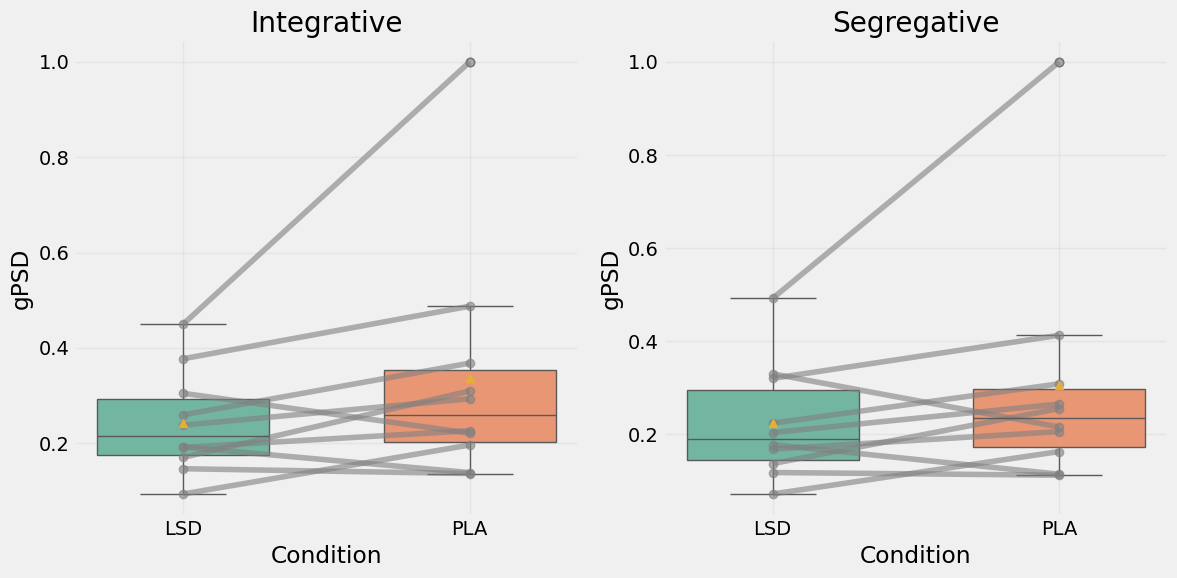

In [8]:

df = pd.DataFrame(data)

# Ensure gFreq and Condition are categorical for proper grouping
df["gFreq"] = pd.Categorical(df["gFreq"], categories=["Integrative", "Segregative"], ordered=True)
df["Condition"] = pd.Categorical(df["Condition"], categories=["LSD", "PLA"], ordered=True)

# Prepare the plot
plt.figure(figsize=(12, 6))

# Loop through each gFreq category
for i, (category, group) in enumerate(df.groupby("gFreq")):
    plt.subplot(1, len(df["gFreq"].unique()), i + 1)
    
    # Add boxplot
    sns.boxplot(data=group, x="Condition", y="gPSD", whis=1.5, palette="Set2", width=0.6, showmeans=True)
    
    # Group by Subject and pivot to get LSD and PLA values for each subject
    pivoted = group.pivot(index="Subject", columns="Condition", values="gPSD")
    
    # Plot paired lines for each subject
    for subject, row in pivoted.iterrows():
        plt.plot(["LSD", "PLA"], row, color="gray", alpha=0.6, marker="o")
    
    # Customize the subplot
    plt.title(category)
    plt.ylabel("gPSD")
    plt.xticks([0, 1], ["LSD", "PLA"])
    plt.xlabel("Condition")
    plt.grid(True, alpha=0.3)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [74]:
scipy.stats.ttest_rel(LSD_low_sum, PLA_low_sum)


TtestResult(statistic=np.float64(-1.7130679582766062), pvalue=np.float64(0.12085102400247734), df=np.int64(9))

In [75]:
scipy.stats.ttest_rel(LSD_high_sum, PLA_high_sum)


TtestResult(statistic=np.float64(-1.653764081693127), pvalue=np.float64(0.13256379407897578), df=np.int64(9))

# Structure-function

In [47]:
import importlib

import tqdm
importlib.reload(utility_functions)

def compute_structure_function(task, drug):
    structure_function = dict()
    for sub in tqdm.tqdm(['003', '005', '006', '009', '010', '013', '015', '016', '017', '018']):
        src_data = np.load(f'{HOMEDIR}/src_data/derivatives/func/{task}/{drug}/sub-{sub}/meg/source_estimates/sub-{sub}_.npz', allow_pickle=True)['stc_data_parcellated']

        integrative, segregative = utility_functions.fullpipeline_integrative_segregative(envelope=src_data, eigevecs=eigvectors)
        
        structure_function[f'{sub}'] = segregative/integrative
    
    return structure_function

In [48]:
LSD_structure_function_normed = compute_structure_function(task='Music', drug='LSD')
 

100%|██████████| 10/10 [05:21<00:00, 32.15s/it]


In [49]:
PLA_structure_function_normed = compute_structure_function(task='Music', drug='PLA')

100%|██████████| 10/10 [05:49<00:00, 34.91s/it]


In [55]:
PLA_structure_function_normed_array = np.array(list(PLA_structure_function_normed.values()))
LSD_structure_function_normed_array = np.array(list(LSD_structure_function_normed.values()))

avg_map = (np.log2(np.mean(LSD_structure_function_normed_array, axis=0)) - np.log2(np.mean(PLA_structure_function_normed_array, axis=0)))

In [51]:
tvals, p_vals = scipy.stats.ttest_rel(np.log2(LSD_structure_function_normed_array), np.log2(PLA_structure_function_normed_array))


/tmp/ipykernel_446080/4092385327.py:10: DeprecationWarning: Applying "mask_img" before signal extraction may result in empty region signals in the output. These are currently kept. Starting from version 0.13, the default behavior will be changed to remove them by setting "keep_masked_labels=False". "keep_masked_labels" parameter will be removed in version 0.15.
  nifti= signals_to_img_labels(signal, path_Glasser, mnitemp["mask"])


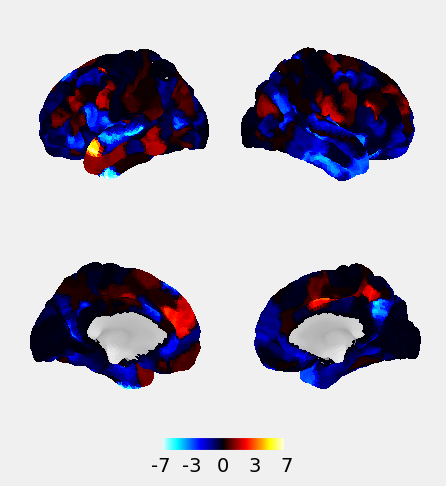

In [72]:
from nilearn import plotting
from nilearn.regions import signals_to_img_labels
from nilearn.datasets import fetch_icbm152_2009

path_Glasser = '/Brain/private/v20subra/LSD_project/src_data/Glasser_masker.nii.gz'
mnitemp = fetch_icbm152_2009()


signal = avg_map
nifti= signals_to_img_labels(signal, path_Glasser, mnitemp["mask"])

plotting.plot_img_on_surf(stat_map=nifti, views=["lateral", "medial"], hemispheres=["left", "right"], symmetric_cbar=True, threshold=0.000001)
plt.show()


/tmp/ipykernel_540428/4188642774.py:2: DeprecationWarning: Applying "mask_img" before signal extraction may result in empty region signals in the output. These are currently kept. Starting from version 0.13, the default behavior will be changed to remove them by setting "keep_masked_labels=False". "keep_masked_labels" parameter will be removed in version 0.15.
  nifti= signals_to_img_labels(signal, path_Glasser, mnitemp["mask"])


(<Figure size 426.667x480 with 5 Axes>,
 [<Axes3D: >, <Axes3D: >, <Axes3D: >, <Axes3D: >, <Axes: >])

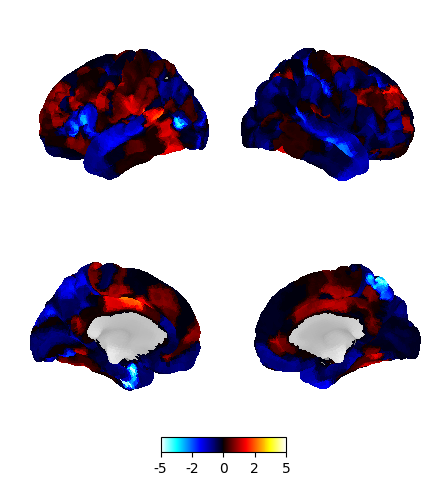

In [66]:
signal = tvals
nifti= signals_to_img_labels(signal, path_Glasser, mnitemp["mask"])

plotting.plot_img_on_surf(stat_map=nifti, views=["lateral", "medial"], hemispheres=["left", "right"], symmetric_cbar=True, threshold=0.000001)



# Thresholded maps, with surrogate signal

In [13]:

import importlib
importlib.reload(utility_functions)

def surrogate_signal(drug):
    surrogate_structure_function = dict()
    
    for sub in tqdm.tqdm(['003', '005', '006', '009', '010', '013', '015', '016', '017', '018']):
        src_data = np.load(f'{HOMEDIR}/src_data/derivatives/func/Music/{drug}/sub-{sub}/meg/source_estimates/sub-{sub}_.npz', allow_pickle=True)['stc_data_parcellated']
        
        
        surrogate_signal = utility_functions.surrogate_eigenmodes(eigvector=eigvectors, signal=src_data.reshape(src_data.shape[1], src_data.shape[0]*src_data.shape[2]), n_surrogate=19)
        
        integrative, segregative = utility_functions.fullpipeline_integrative_segregative(envelope=surrogate_signal, eigevecs=eigvectors, eigvals=eigvals, is_surrogate=False, in_seconds=False)
        
        surrogate_structure_function[f'{sub}'] = segregative/integrative
    
    return surrogate_structure_function
    

In [14]:

surrogate_sf_LSD = surrogate_signal(drug='LSD')
surrogate_sf_PLA = surrogate_signal(drug='PLA')

100%|██████████| 10/10 [11:00<00:00, 66.06s/it]


In [16]:
LSD_array

NameError: name 'LSD_array' is not defined

In [14]:
surrogate_signal_LSD_array = [list(surrogate_signal_LSD[f"{sub}"]) for sub in surrogate_signal_LSD.keys()]

In [ ]:
surrogate_signal_PLA_array = [list(surrogate_signal_PLA[f"{sub}"]) for sub in surrogate_signal_PLA.keys()]

# Envelopes

In [ ]:
import numpy as np
import scipy.signal as signal
from scipy.signal import hilbert
import matplotlib.pyplot as plt
import tqdm


def get_envelopes(wideband_signal, low, high, fs):
    fs = 500  
    band_envelopes = {}


    # Design a bandpass filter
    sos = signal.butter(4, [low, high], btype="bandpass", fs=fs, output="sos")
    band_signal = signal.sosfilt(sos, wideband_signal)
    
    # Compute the analytic signal and envelope
    analytic_signal = hilbert(band_signal)
    envelope = np.abs(analytic_signal)
    
    # Store the envelope
    band_envelopes = envelope

    return band_envelopes



# LSD - Envelopes

In [27]:

task = 'Music'
drug = 'LSD'

frequency_bands = {
"Delta": (0.5, 4),
"Theta": (4, 8),
"Alpha": (8, 13),
"Beta": (13, 30),
"Gamma": (30, 100)
}
envelopes_LSD = dict({f'{band}': dict() for band in frequency_bands.keys()})
for band, (low, high) in tqdm.tqdm(frequency_bands.items()):

    for sub in ['003', '005', '006', '009', '010', '013', '015', '016', '017', '018']:

        src_data = np.load(f'{HOMEDIR}/src_data/derivatives/func/{task}/{drug}/sub-{sub}/meg/source_estimates/sub-{sub}_.npz', allow_pickle=True)['stc_data_parcellated']
        envelopes_LSD[band][f'{sub}'] = get_envelopes(src_data, low=low, high=high, fs=500)


100%|██████████| 5/5 [05:47<00:00, 69.40s/it]


# LSD - PLA

In [29]:
task = 'Music'
drug = 'PLA'

frequency_bands = {
"Delta": (0.5, 4),
"Theta": (4, 8),
"Alpha": (8, 13),
"Beta": (13, 30),
"Gamma": (30, 100)
}
envelopes_PLA = dict({f'{band}': dict() for band in frequency_bands.keys()})
for band, (low, high) in tqdm.tqdm(frequency_bands.items()):

    for sub in ['003', '005', '006', '009', '010', '013', '015', '016', '017', '018']:

        src_data = np.load(f'{HOMEDIR}/src_data/derivatives/func/{task}/{drug}/sub-{sub}/meg/source_estimates/sub-{sub}_.npz', allow_pickle=True)['stc_data_parcellated']
        envelopes_PLA[band][f'{sub}'] = get_envelopes(src_data, low=low, high=high, fs=500)


100%|██████████| 5/5 [06:20<00:00, 76.10s/it]


TtestResult(statistic=np.float64(-1.5660715078223053), pvalue=np.float64(0.15177333978161228), df=np.int64(9))
TtestResult(statistic=np.float64(-1.653189629302831), pvalue=np.float64(0.13268213627268535), df=np.int64(9))


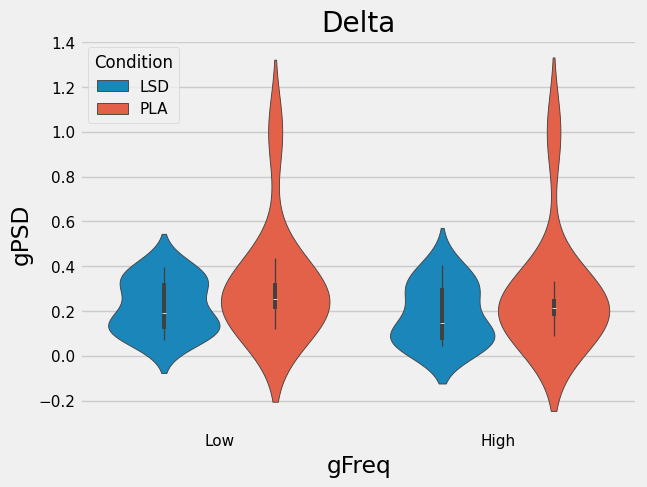

TtestResult(statistic=np.float64(-1.8888891643724937), pvalue=np.float64(0.09149844519388058), df=np.int64(9))
TtestResult(statistic=np.float64(-2.076807087533534), pvalue=np.float64(0.06761417148490706), df=np.int64(9))


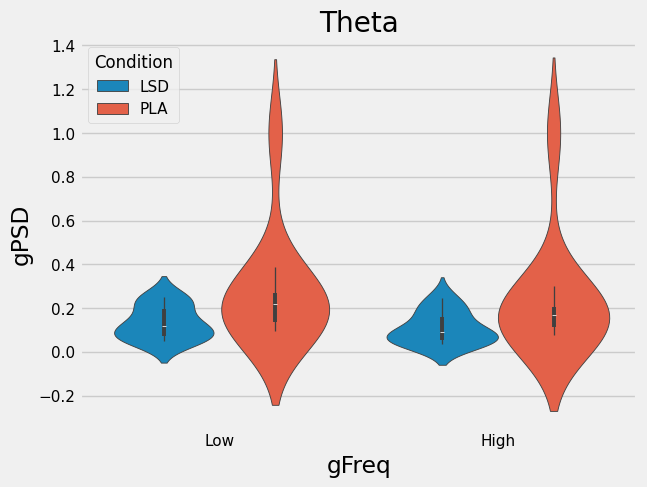

TtestResult(statistic=np.float64(-1.9639357160747148), pvalue=np.float64(0.08112948837584397), df=np.int64(9))
TtestResult(statistic=np.float64(-2.21397283840269), pvalue=np.float64(0.054093475531193515), df=np.int64(9))


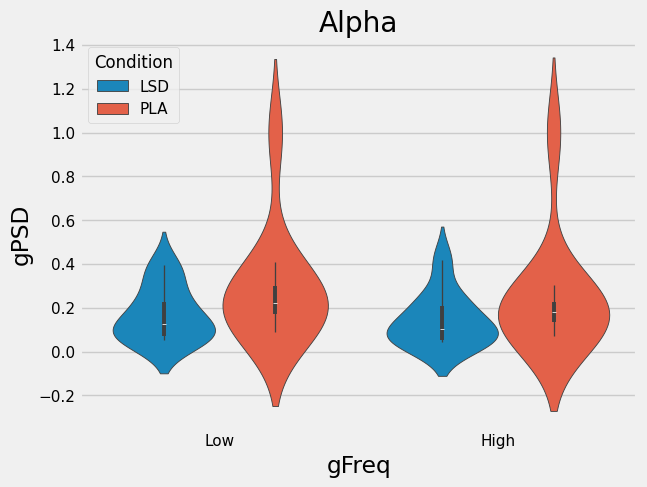

TtestResult(statistic=np.float64(-2.3911734780064573), pvalue=np.float64(0.04047944134901472), df=np.int64(9))
TtestResult(statistic=np.float64(-2.639042189296765), pvalue=np.float64(0.026956071487008258), df=np.int64(9))


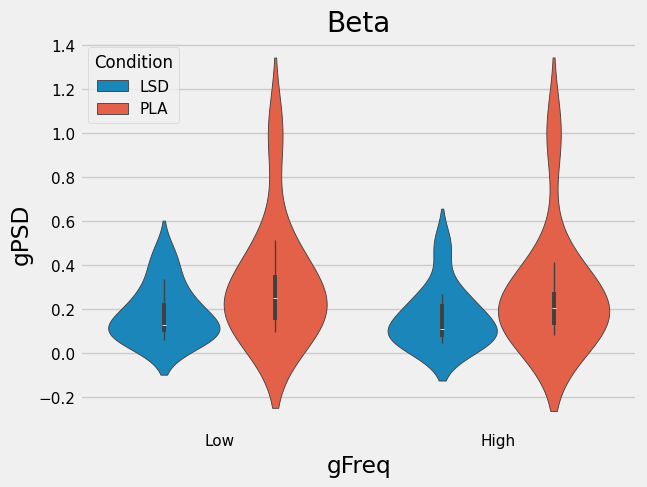

TtestResult(statistic=np.float64(0.6633491766486905), pvalue=np.float64(0.523732503930956), df=np.int64(9))
TtestResult(statistic=np.float64(0.6018262291229034), pvalue=np.float64(0.562141852206214), df=np.int64(9))


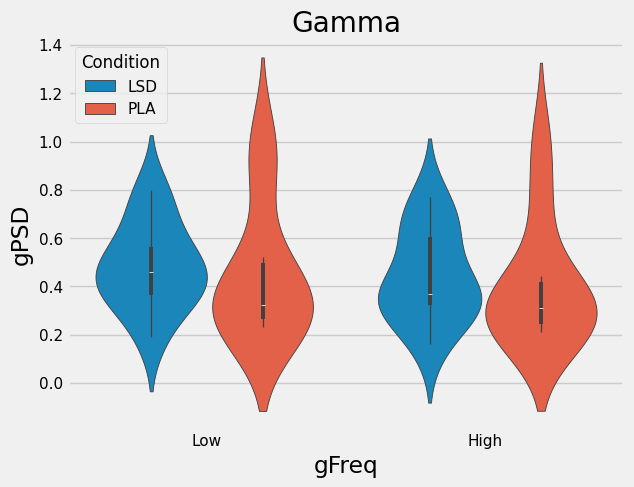

In [167]:
def compute_psd_subjects_envelopes(envelopes, band):
    psd_subjects = dict() 
    for sub in envelopes[f'{band}'].keys():
        src_data = envelopes[f'{band}'][sub]
        psd_subjects[f'{sub}'] = graph_psd_compute(src_data, eigvectors)

    return psd_subjects


for band in frequency_bands.keys():
    LSD = compute_psd_subjects_envelopes(envelopes_LSD, band=f'{band}')
    PLA = compute_psd_subjects_envelopes(envelopes_PLA, band=f'{band}')
    
    
    LSD_low, LSD_medium, LSD_high = frequency_splits(np.array(list(LSD.values())))
    PLA_low, PLA_medium, PLA_high = frequency_splits(np.array(list(PLA.values())))
    
    

    LSD_high_sum = np.sum(LSD_high, axis=1)
    LSD_low_sum = np.sum(LSD_low, axis=1)
    LSD_medium_sum = np.sum(LSD_medium, axis=1)

    PLA_high_sum = np.sum(PLA_high, axis=1)
    PLA_low_sum = np.sum(PLA_low, axis=1)
    PLA_medium_sum = np.sum(PLA_medium, axis=1)


    LSD_high_sum_norm = LSD_high_sum / np.max([LSD_high_sum, PLA_high_sum])
    PLA_high_sum_norm = PLA_high_sum / np.max([LSD_high_sum, PLA_high_sum])

    LSD_medium_sum_norm = LSD_medium_sum / np.max([LSD_medium_sum, PLA_medium_sum])
    PLA_medium_sum_norm = PLA_medium_sum / np.max([LSD_medium_sum, PLA_medium_sum])

    LSD_low_sum_norm = LSD_low_sum / np.max([LSD_low_sum, PLA_low_sum])
    PLA_low_sum_norm = PLA_low_sum / np.max([LSD_low_sum, PLA_low_sum])



    data = pd.DataFrame({
        
        'Condition': ['LSD'] * 20 + ['PLA'] * 20 ,
        'gFreq': ['Low'] * 10 + ['High'] * 10 + ['Low'] * 10 +  ['High'] * 10,
    
        'gPSD': np.concatenate([LSD_low_sum_norm, LSD_high_sum_norm, 
                                PLA_low_sum_norm, PLA_high_sum_norm])
    })

    sns.violinplot(x='gFreq', hue='Condition', y='gPSD', data=data)
    print(scipy.stats.ttest_rel(LSD_high_sum, PLA_high_sum))
    print(scipy.stats.ttest_rel(LSD_low_sum, PLA_low_sum))
    plt.title(f'{band}')
    plt.show()

# Effect of temporal resolution

In [217]:
from matplotlib.mlab import psd


def graph_psd_compute_modified(src_data, eigvectors):
    # Compute PSD for each epoch and average across epochs
    n_epochs, _, _ = src_data.shape
    psd_all = list()
    for epoch in range(n_epochs):
        psd, _ = utility_functions.compute_gpsd(src_data[epoch], eigvectors)
        psd_all.append(psd)
    
    return psd_all

psd_subs_LSD = dict()
psd_subs_PLA = dict()

for sub in ['003', '005', '006', '009', '010', '013', '015', '016', '017', '018']:

    psd_subs_LSD[f'{sub}'] = graph_psd_compute_modified(envelopes_LSD['Gamma'][f'{sub}'], eigvectors)
    psd_subs_PLA[f'{sub}'] = graph_psd_compute_modified(envelopes_PLA['Gamma'][f'{sub}'], eigvectors)


# plt.semilogy(eigvals,np.array(psd_subs_LSD[f'{sub}']).T, color='blue', alpha=0.1)
# plt.semilogy(eigvals,np.array(psd_subs_PLA[f'{sub}']).T, color='red', alpha=0.1)

In [218]:
LSD_std = dict()
PLA_std = dict()
for sub in ['003', '005', '006', '009', '010', '013', '015', '016', '017', '018']:
    LSD_std[sub] = np.std(np.array(psd_subs_LSD[f'{sub}']).T, axis=1)
    PLA_std[sub] = np.std(np.array(psd_subs_PLA[f'{sub}']).T, axis=1)

In [219]:
scipy.stats.ttest_rel(np.array(list(LSD_std.values())), np.array(list(PLA_std.values())), axis=0)

TtestResult(statistic=array([ 9.25385171e-01,  8.14292868e-01, -6.17906288e-01,  1.33720836e+00,
        2.21185898e-01,  1.89432210e-01,  4.73395285e-02,  1.63347896e+00,
        3.18831218e-02,  4.20782143e-01,  1.98036617e+00,  1.93099328e+00,
        1.04319787e-02, -5.75534978e-01,  1.55551044e+00,  1.61666527e+00,
        8.43180636e-01,  7.31297967e-01,  1.21739124e+00, -2.58235451e-01,
       -8.98302303e-01, -5.26392702e-01,  1.40814248e-01,  6.49033935e-01,
        1.12675945e+00,  9.86615252e-01,  7.72824495e-01, -5.78763841e-02,
       -8.29763282e-01,  1.37525623e-01, -1.15044639e+00,  1.01174565e+00,
        1.06073632e-02,  3.41509523e-01,  1.01242686e+00, -1.52407530e-01,
       -3.59831414e-01,  3.74501239e-01,  1.30624502e+00,  8.77368593e-01,
        2.30518330e+00, -4.54275787e-01,  3.51625992e-01,  1.67040189e+00,
        1.20836916e+00,  1.59569122e+00, -8.35640975e-01,  2.65087853e-01,
        1.59056483e+00,  2.46785204e+00,  3.37566376e-01,  1.14545905e-01,
   

In [70]:
def cohen_d(x, y):
    diff = x - y
    return np.mean(diff) / np.std(diff, ddof=1)

# effect_size = cohen_d(LSD_low_sum_norm, PLA_low_sum_norm)
# print(f"Cohen's d: {effect_size}")



# Integration Segregation components

In [53]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

def compute_gap_spectrum(eigenvalues):
    """Fit a spline to eigenvalues and compute the second derivative."""
    x = np.linspace(0, len(eigenvalues)-1, len(eigenvalues))
    spline = UnivariateSpline(x, eigenvalues, k=5, s=3)
    second_derivative = spline.derivative(n=2)(x)
    return second_derivative

def find_critical_points(second_derivative):
    """Identify the indices of maxima and minima in the 2nd order gap spectrum."""
    zero_crossings = np.where(np.diff(np.sign(second_derivative)))[0]
    print(zero_crossings)
    return zero_crossings

def plot_gap_spectrum(eigenvalues, second_derivative, title='2nd Order Gap Spectrum'):
    """Plot eigenvalues and their second derivative."""
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.plot(eigenvalues, label='Eigenvalues')
    plt.title('Eigenvalues')
    plt.subplot(122)
    plt.plot(second_derivative, label='2nd Order Derivative')
    plt.title(title)
    plt.tight_layout()
    plt.show()


Eigenvalues: [-7.88953361e-16  4.50751633e-02  6.76998430e-02  1.18036926e-01
  1.27776384e-01  1.54971154e-01  1.77597068e-01  1.86483529e-01
  1.96009790e-01  2.26479037e-01  2.42375834e-01  2.62752220e-01
  2.75853802e-01  2.77889264e-01  2.99325853e-01  3.00761910e-01
  3.12165722e-01  3.17245071e-01  3.23343688e-01  3.39009828e-01
  3.57539356e-01  3.63857214e-01  3.82327745e-01  4.00065148e-01
  4.08476793e-01  4.11824701e-01  4.31661829e-01  4.42715651e-01
  4.62167463e-01  4.68045472e-01  4.74178113e-01  4.86874741e-01
  4.89524566e-01  4.93125572e-01  5.00615762e-01  5.23635813e-01
  5.30136830e-01  5.37439792e-01  5.40843421e-01  5.46159352e-01
  5.69017361e-01  5.87637654e-01  5.90418019e-01  6.00631220e-01
  6.07213481e-01  6.09086395e-01  6.20251314e-01  6.22824422e-01
  6.30220052e-01  6.40181328e-01  6.45504061e-01  6.50308507e-01
  6.64703288e-01  6.68797621e-01  6.83073874e-01  6.92085337e-01
  6.97396394e-01  7.00853270e-01  7.07545705e-01  7.13270107e-01
  7.14322476

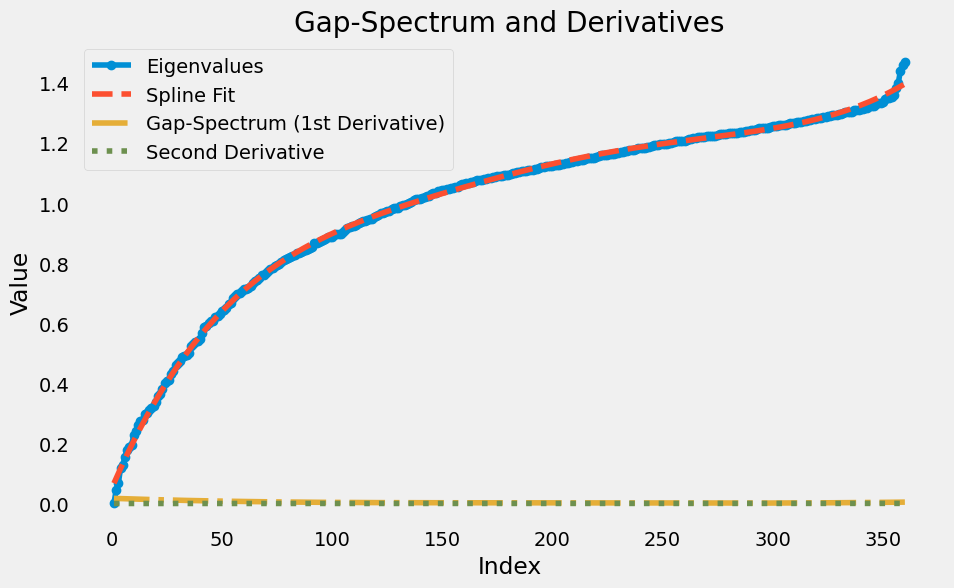

In [61]:
import numpy as np
from scipy.interpolate import splrep, splev

def compute_gap_spectrum(eigenvalues, knots=3, order=4):
    """
    Computes the gap-spectrum from a set of eigenvalues.

    Parameters
    ----------
    eigenvalues : numpy.ndarray
        Array of eigenvalues sorted in ascending order.
    knots : int, optional
        Number of knots for the spline fit. Default is 3.
    order : int, optional
        Polynomial order of the spline. Default is 4.

    Returns
    -------
    gap_spectrum : numpy.ndarray
        First derivative of the spline fit, representing the gap-spectrum.
    second_derivative : numpy.ndarray
        Second derivative of the spline fit, useful for detecting maxima/minima.
    spline_fit : numpy.ndarray
        Spline fit of the eigenvalues.
    indices : numpy.ndarray
        Indices corresponding to the eigenvalues for plotting.
    """
    nroi = len(eigenvalues)
    indices = np.arange(1, nroi + 1)  # 1-based index like in MATLAB

    # Fit a spline to the eigenvalues
    spline_tck = splrep(indices, eigenvalues, k=order, t=np.linspace(1, nroi, knots)[1:-1])
    spline_fit = splev(indices, spline_tck)

    # Compute the first and second derivatives (gap-spectrum and curvature)
    gap_spectrum = splev(indices, spline_tck, der=1)
    second_derivative = splev(indices, spline_tck, der=2)

    return gap_spectrum, second_derivative, spline_fit, indices


# Example usage
if __name__ == "__main__":
    # Example eigenvalues
    eigenvalues = eigvals
    
    # Compute the gap-spectrum
    gap_spectrum, second_derivative, spline_fit, indices = compute_gap_spectrum(
        eigenvalues, knots=3, order=4
    )

    # Print results
    print("Eigenvalues:", eigenvalues)
    print("Gap-spectrum (1st derivative):", gap_spectrum)
    print("Second derivative:", second_derivative)

    # Plotting (optional)
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.plot(indices, eigenvalues, 'o-', label="Eigenvalues")
    plt.plot(indices, spline_fit, '--', label="Spline Fit")
    plt.plot(indices, gap_spectrum, '-.', label="Gap-Spectrum (1st Derivative)")
    plt.plot(indices, second_derivative, ':', label="Second Derivative")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.title("Gap-Spectrum and Derivatives")
    plt.legend()
    plt.grid()
    plt.show()


[0]


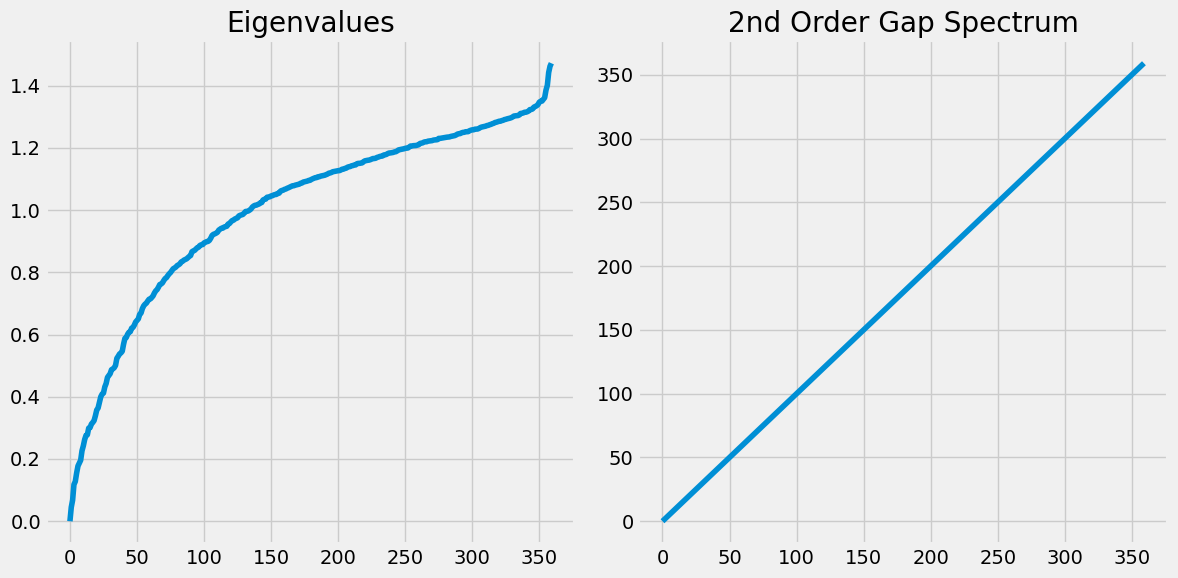

In [54]:
# Example data: Simulated eigenvalues for 3 subjects
all_critical_points = []


second_derivative = compute_gap_spectrum(eigvals)

zero_crossings = find_critical_points(second_derivative)

all_critical_points.append(zero_crossings)
plot_gap_spectrum(eigvals, second_derivative)


In [33]:
zero_crossings 

array([274])

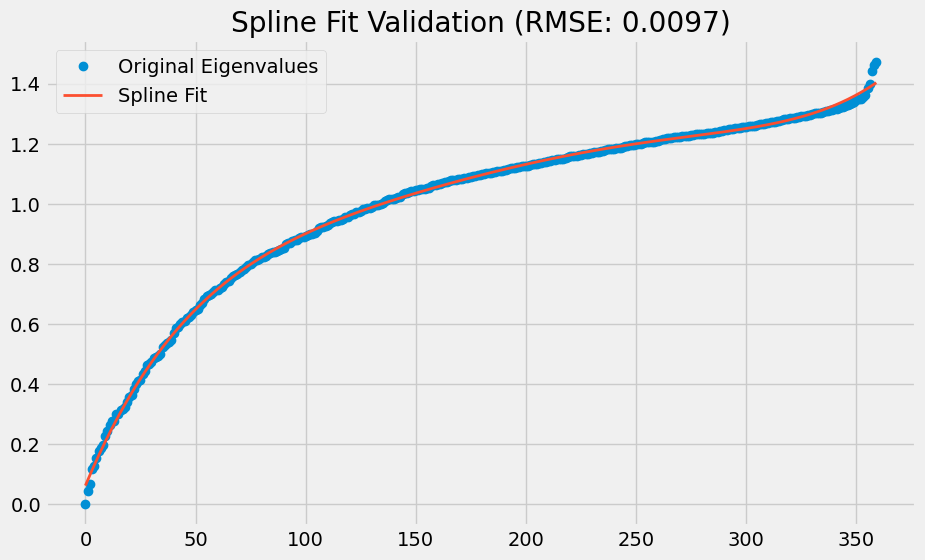

In [32]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

# Generate example eigenvalues (Replace this with your actual data)
np.random.seed(42)  # For reproducibility
eigenvalues = eigvals

# Define the indices for the eigenvalues
x_indices = np.arange(len(eigenvalues))

# Fit a spline to the eigenvalues with order 10 and 3 internal knots
knots = np.quantile(eigenvalues, [0.25, 0.5, 0.75])
spline = UnivariateSpline(x=x_indices, y=eigenvalues, k=5, s=3)

# Generate a dense range of points to evaluate the spline and make a smooth curve
x_dense = np.linspace(0, len(eigenvalues) - 1, 360)
spline_values = spline(x_dense)

# Calculate RMSE to quantify the fit error
spline_approximation = spline(x_indices)  # Evaluate spline at the original data points
rmse = np.sqrt(np.mean((spline_approximation - eigenvalues) ** 2))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_indices, eigenvalues, 'o', label='Original Eigenvalues')
plt.plot(x_dense, spline_values, label='Spline Fit', linewidth=2)
plt.title(f'Spline Fit Validation (RMSE: {rmse:.4f})')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from scipy.interpolate import BSpline, splrep, splev
from scipy.signal import find_peaks

def find_ev_IntDegSeg(ev, method='2deriv', knots=3, order=10):
    """
    Finds the two indices bounding Int, Deg, Seg regimes based on eigenvalue analysis.
    
    Parameters
    ----------
    ev : numpy.ndarray
        The eigenvalues of the Laplacian.
    method : str, optional
        Method to identify regime boundaries:
        - '1deriv': Uses the analytical first derivative and partitions the data
                    into three segments based on change points in the RMS statistic.
        - '2deriv': Uses the analytical second derivative and finds its first
                    maxima and last minima as regime bounds.
    knots : int, optional
        Number of knots in the spline. Default is 3.
    order : int, optional
        Polynomial order of the spline. Default is 10.

    Returns
    -------
    ev_changepts : list of int
        The identified change points in the eigen-spectrum.
    ev_sfit : numpy.ndarray
        The spline fit to the eigenvalues.
    ev_1deriv : numpy.ndarray
        The analytical first derivative.
    ev_2deriv : numpy.ndarray
        The analytical second derivative (if method is '2deriv').
    """
    nroi = len(ev)

    # Fit a spline to the eigenvalues
    spline_tck = splrep(np.arange(1, nroi+1), ev, k=order, t=np.linspace(1, nroi, knots)[1:-1])
    ev_sfit = splev(np.arange(1, nroi+1), spline_tck)
    
    # Compute the first derivative
    ev_1deriv = splev(np.arange(1, nroi+1), spline_tck, der=1)

    ev_changepts = []
    ev_2deriv = None

    if method == '1deriv':
        # RMS-based change points
        diff_squared = ev_1deriv**2
        cumulative_sum = np.cumsum(diff_squared)
        total_rms = np.sqrt(cumulative_sum[-1] / nroi)
        threshold = 0.5 * total_rms  # Example threshold for splitting
        
        change_point_indices = np.where(diff_squared > threshold)[0]
        if len(change_point_indices) >= 2:
            ev_changepts = [change_point_indices[0], change_point_indices[-1]]
        else:
            ev_changepts = [nroi // 3, 2 * nroi // 3]  # Default if change points are insufficient

    elif method == '2deriv':
        # Compute the second derivative
        ev_2deriv = splev(np.arange(1, nroi+1), spline_tck, der=2)
        
        # Find the first local maximum and the last local minimum in the second derivative
        max_peaks, _ = find_peaks(ev_2deriv)
        min_peaks, _ = find_peaks(-ev_2deriv)
        
        if len(max_peaks) > 0 and len(min_peaks) > 0:
            ev_changepts = [max_peaks[0], min_peaks[-1]]
        else:
            print("none")
            ev_changepts = [nroi // 3, 2 * nroi // 3]  # Default if no peaks are found

    return ev_changepts, ev_sfit, ev_1deriv, ev_2deriv


# Example usage
if __name__ == "__main__":
    # Sample eigenvalues for testing
    ev = eigvals
    method = '2deriv'  # or '1deriv'
    knots = 3
    order = 4

    ev_changepts, ev_sfit, ev_1deriv, ev_2deriv = find_ev_IntDegSeg(ev, method, knots, order)

    print("Change points:", ev_changepts)
    print("Spline fit:", ev_sfit)
    print("First derivative:", ev_1deriv)
    if ev_2deriv is not None:
        print("Second derivative:", ev_2deriv)


Change points: [np.int64(164), np.int64(211)]
Spline fit: [0.06713979 0.08380918 0.1002279  0.1163989  0.13232517 0.14800962
 0.16345518 0.17866476 0.19364123 0.20838747 0.22290631 0.23720059
 0.25127311 0.26512666 0.27876403 0.29218796 0.30540119 0.31840644
 0.33120641 0.34380377 0.3562012  0.36840133 0.3804068  0.39222021
 0.40384414 0.41528118 0.42653388 0.43760476 0.44849634 0.45921113
 0.4697516  0.48012022 0.49031942 0.50035163 0.51021925 0.51992468
 0.52947028 0.53885841 0.54809139 0.55717155 0.56610117 0.57488253
 0.5835179  0.59200951 0.60035959 0.60857035 0.61664395 0.62458259
 0.63238839 0.6400635  0.64761003 0.65503006 0.66232569 0.66949896
 0.67655191 0.68348656 0.69030492 0.69700897 0.70360067 0.71008198
 0.71645481 0.72272109 0.72888271 0.73494153 0.74089942 0.7467582
 0.75251971 0.75818573 0.76375806 0.76923845 0.77462866 0.7799304
 0.78514539 0.79027532 0.79532185 0.80028665 0.80517135 0.80997756
 0.81470689 0.81936091 0.82394118 0.82844926 0.83288666 0.83725489
 0.841

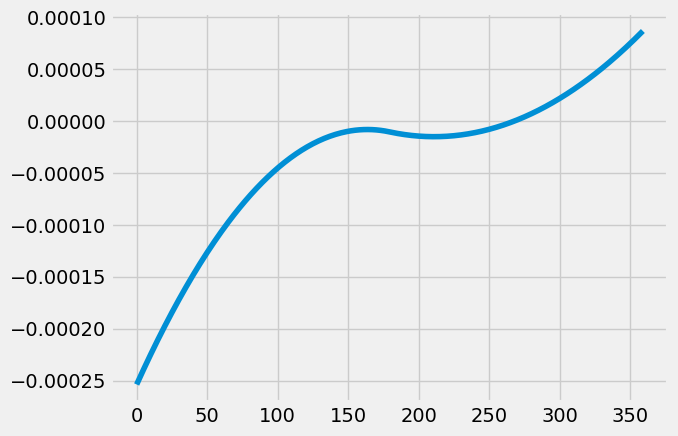

In [63]:
plt.plot(ev_2deriv)